In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import math

### **여러가지 변수를 넣은 군집 분석 결과를 프로토타입으로 만들었더니 몇 가지 단점이 발견됨**

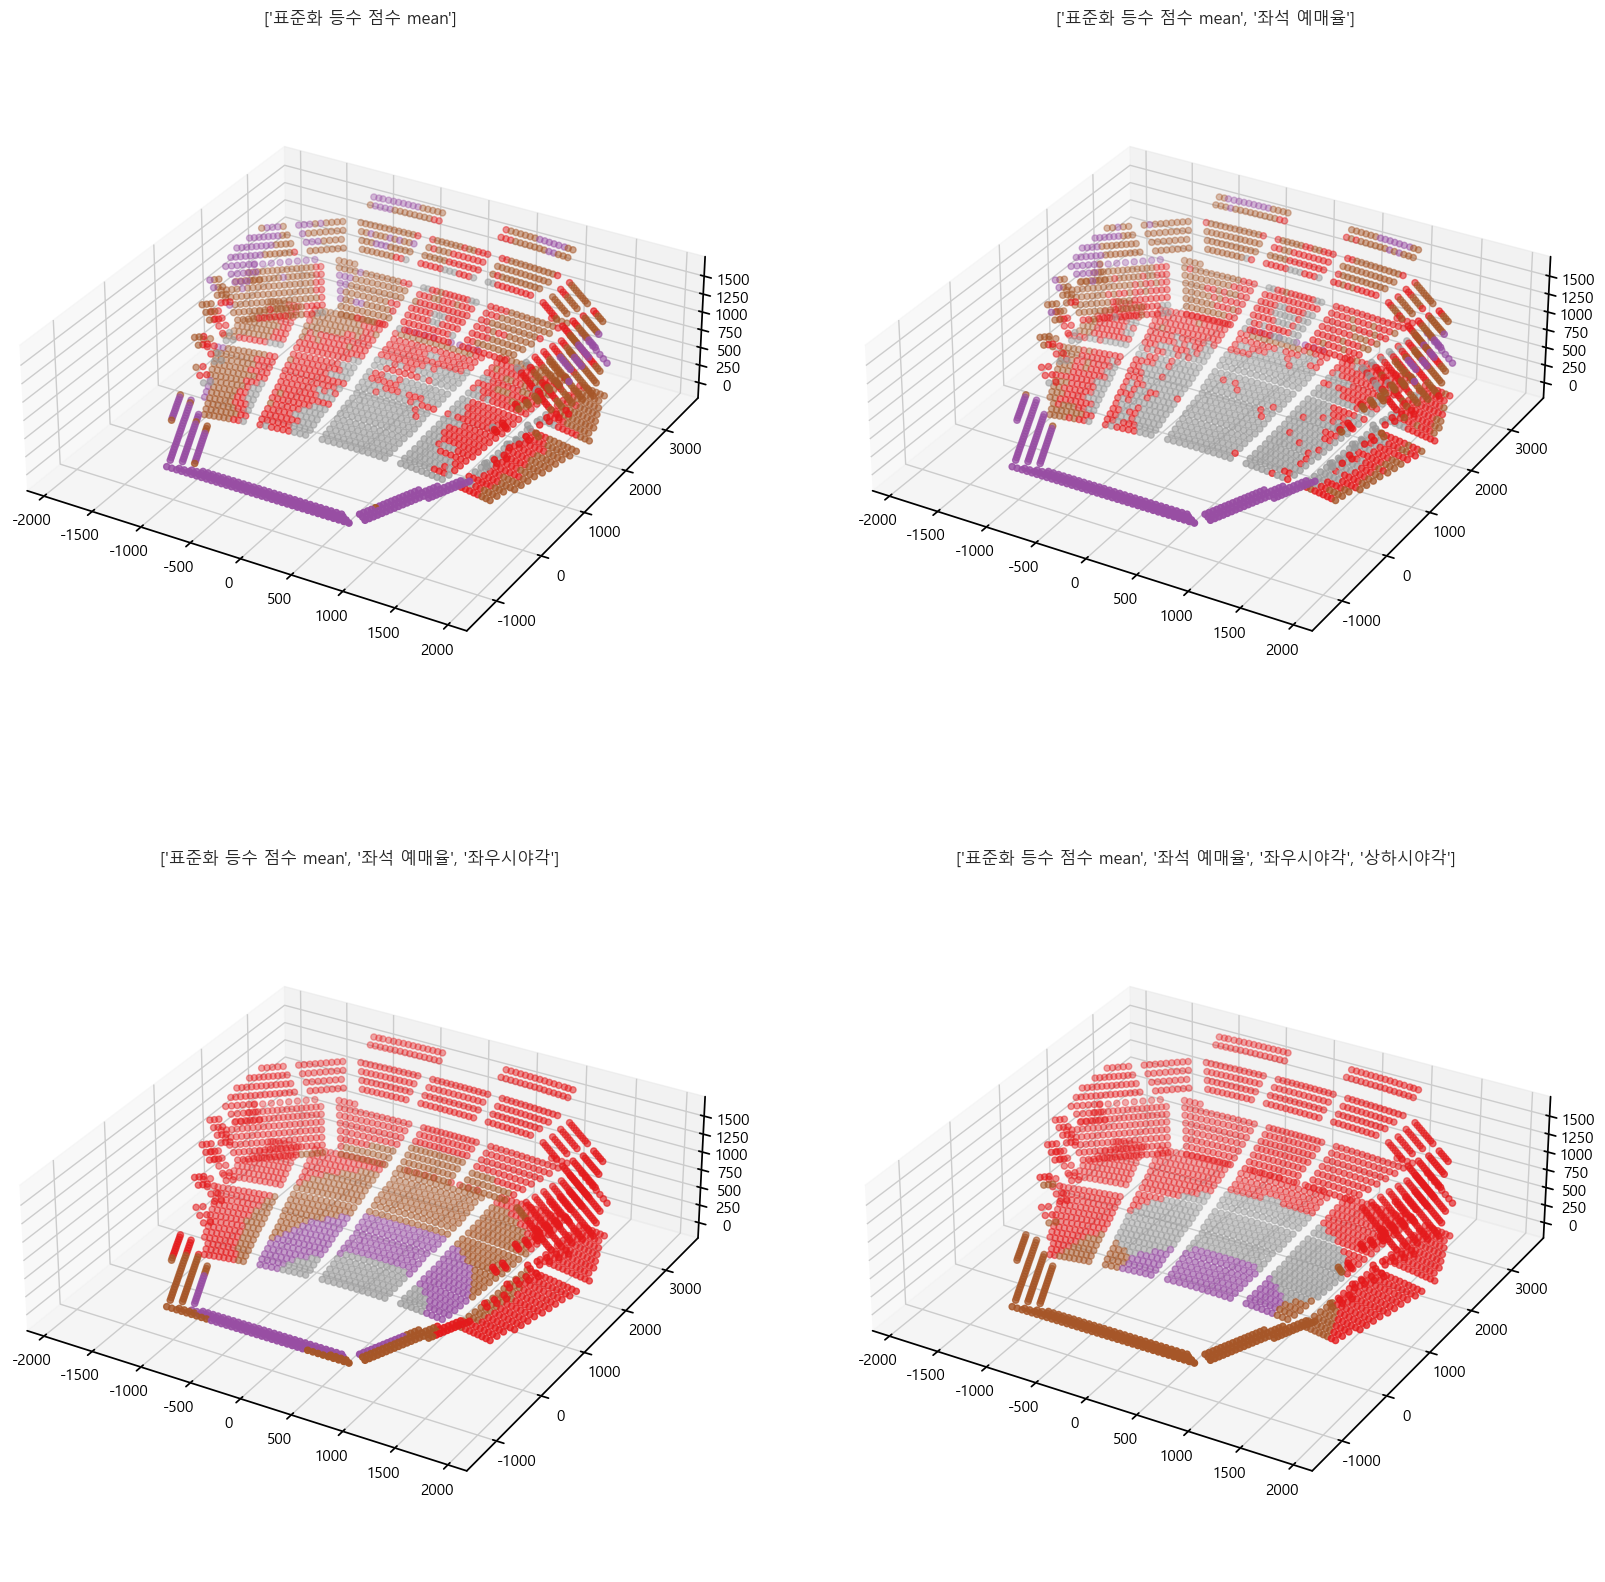

In [2]:
Image.open("C:/Users/whileduck/Desktop/군집분석 프로토타입.png")

1. 거리 혹은 시야각등의 변수가 들어가니 합창석과 1층의 위치가 동일하게 묶임 

2. 음향적인 부분이나 사용자의 취향 등으로 좌석의 좌,우 중 선호하는 방향이 있을 수 있으며 등급 선정 시에도 중요한 변수로 사용 될 수 있을 것이라 생각됨 


----

전체 데이터에 합창석 유,무 라는 것을 나타낼 수 있는 것과, 무대의 좌, 우 혹은 벽면에 붙어있는가에 대한 정보를 맵핑해둘 필요가 있다고 생각함 

### 이전에 계산한 좌우 시야각과 상하 시야각은 무대가 보이는 ***면적*** 에 대한 이야기였다면 ***어디가 보이는지*** 에 대한 각도는 계산한 적이 없다

어디가 보이는지에 대한 데이터를 추가하자

In [3]:
seat_information = pd.read_csv("C:/Users/whileduck/Desktop/Github/Concert-Hall-Price-Model/data/seat_information_angle.csv",encoding = 'utf-8')

coordinate = np.array(seat_information[['X','Y','Z']])

coordinate

array([[ 1451,   542,   -93],
       [ 1406,   555,   -93],
       [ 1361,   568,   -93],
       ...,
       [-1454,   617,   428],
       [-1522,   677,   483],
       [-1568,   624,   483]], dtype=int64)

In [4]:
X = coordinate[:,0]
Y = coordinate[:,1]
Z = coordinate[:,2]

horizontal_angle = np.degrees(np.arctan2(X,Y)) # 좌우 시야각

vertical_angle = np.degrees(np.arctan2(Z, np.sqrt(X **2 + Y ** 2) )) # 좌우 시야각

In [5]:
seat_information['좌우시야각'] = horizontal_angle
seat_information['상하시야각'] = - vertical_angle

In [6]:
seat_information

,층,블록,열,넘버,전체_좌석,X,Y,Z,대칭점,무대까지의 거리,좌우면적시야각,상하면적시야각,좌우시야각,상하시야각
0,1층,A블록,1,1,1층 A블록1열 1,1451,542,-93,1층 E블록1열 9,1551.713247,15.219900,33.948421,69.517555,3.436010
1,1층,A블록,1,2,1층 A블록1열 2,1406,555,-93,1층 E블록1열 8,1514.433888,16.945594,34.331746,68.459024,3.520697
2,1층,A블록,1,3,1층 A블록1열 3,1361,568,-93,1층 E블록1열 7,1477.698887,18.869853,34.695385,67.347261,3.608334
3,1층,A블록,1,4,1층 A블록1열 4,1315,580,-93,1층 E블록1열 6,1440.234009,21.009736,35.069575,66.199420,3.702327
4,1층,A블록,1,5,1층 A블록1열 5,1270,591,-93,1층 E블록1열 5,1403.862529,23.314833,35.426958,65.044882,3.798387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500,2층,BOX6,없음,2,2층 BOX6 2,-1432,505,383,2층 BOX1 1,1565.994253,21.173142,34.169657,-70.574617,-14.156604
2501,2층,BOX6,없음,3,2층 BOX6 3,-1500,565,428,2층 BOX1 4,1659.038577,21.144470,32.190452,-69.360281,-14.950280
2502,2층,BOX6,없음,4,2층 BOX6 4,-1454,617,428,2층 BOX1 3,1636.456232,23.354990,31.913243,-67.006224,-15.161505
2503,2층,BOX6,없음,5,2층 BOX6 5,-1522,677,483,2층 BOX1 6,1734.388077,23.078793,30.097223,-66.020049,-16.169769


In [7]:
file_path = 'C:/Users/whileduck/Desktop/Github/Concert-Hall-Price-Model/data/'

seat_information.to_csv(file_path + 'seat_information_angle_ver2.csv',index = False)